In [150]:
%load_ext autoreload
%autoreload 2

import os
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from context import ml_project
from ml_project.io import DataHandler
from ml_project.train import neural_nets
from sklearn.preprocessing import StandardScaler
import tables

# To surpress sklearn warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
_ = np.seterr(divide='ignore', invalid='ignore')

print(f'Tensorflow version: {tf.__version__}')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Tensorflow version: 1.13.1


# How-To

1) Download the zip folder holding the data  
2) Create a directory inside the *PROJECT_ROOT_DIR*/data and give it a suitable name *DIR_NAME*, e.g. "task3_data"   
3) Extract the files from the zip folder into *DIR_NAME*  
4) Set the correct *DIR_NAME* in the following cell...  (no need for full absolute path)

In [2]:
DIR_NAME = 'task3_data'

# Load Data and aggregate feature matrix

In [3]:
data_handler = DataHandler(DIR_NAME)
train_data = data_handler.load_train_data('train.h5', 'h5')
final_test_data = data_handler.load_test_data('test.h5', 'h5')  # only used for submission
final_indices = final_test_data.index

In [4]:
HELD_OUT_TEST_SET_SIZE = 0  # used for out of sample classifier performance evaluation

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(['y'], axis=1), 
                                                    train_data['y'], 
                                                    test_size=HELD_OUT_TEST_SET_SIZE,
                                                    random_state=42)

X_train, X_test, y_train, y_test = X_train.as_matrix(), X_test.as_matrix(), y_train.as_matrix(), y_test.as_matrix()

# Normalize the data

In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
final_test_data = scaler.transform(final_test_data)
if len(X_test) > 0:
    X_test = scaler.transform(X_test)

(45324, 120) (45324,)
[2 1 2 ... 1 3 1]


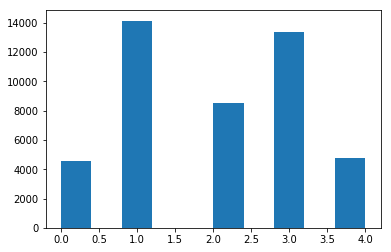

distinct values in y:[2 1 3 4 0]
The minimal amount of samples is 4542
The MAX amount of samples is 14142
            0         1         2         3         4         5         6    \
4125   0.589795 -1.229887  0.076804  0.867426 -0.911172  2.004537 -2.464717   
23183  0.693468  0.817191 -0.365670  1.280717  1.537938 -0.206420 -1.296664   
2424   0.790615 -0.925382 -0.280006 -1.801127 -0.009220  1.830723 -1.347067   
23567  1.011429 -0.727816 -0.658537  0.687023  0.614743  0.538056 -1.710679   
33513  0.217795  0.853043 -0.931077  0.893833 -0.840554 -1.299708  1.607186   
29580  1.319511  1.046971  0.650182 -0.281720  0.753791 -0.065565  1.377639   
10505  0.070069  0.078168  1.132781  0.154724 -1.991281 -1.219190 -0.048747   
23898 -0.106547 -1.561344 -0.851612  1.083834  0.219546 -0.101990 -0.215962   
22554  1.154875  1.039941 -0.150171  1.065847  0.582076 -1.074466 -0.144538   
9036   1.051885  0.591246  0.047762 -0.862074  1.204032 -0.289196  0.646233   
29968  0.987161  0.335035

            0         1         2         3         4         5         6    \
19846 -1.599857  0.511785  2.013872  0.769548 -0.371196 -1.922276  0.051497   
360   -0.211067  1.014421  0.712528  0.560753 -0.509345 -0.201691  0.734253   
28436  0.954333 -0.368408 -0.462390  0.477409  0.833595  1.496361  0.936791   
41860 -0.798046 -1.386243 -0.840163  0.341222  0.064598  0.645202 -0.904496   
42150  1.848319 -0.275036 -1.873838  1.262400  0.941215 -0.193202  0.080254   
37185  1.670088 -0.098600 -0.679865 -0.029741 -0.228682 -0.160481 -0.178774   
25748  1.482499  0.208585  0.097793  0.075654  1.092345 -0.005846  0.124367   
20617 -1.181377  0.214347  0.861174  1.322365  0.790947 -0.477194 -0.671285   
18824  1.073886  0.603000 -0.869015  1.143230 -0.770562 -1.276429  0.298361   
3110   0.550363 -0.823556 -1.148322 -1.748773  0.555323 -1.231036  0.433904   
30728  0.779970 -0.472921 -1.576410 -0.432529 -0.461737  1.327438  0.395590   
5854   1.565014 -0.147061 -0.068743 -0.054799  1.066

            0         1         2         3         4         5         6    \
36604 -2.133991  0.831227  0.952048  1.018572  0.692355 -0.595943  1.011507   
10238 -2.718813 -0.795029 -0.610481  0.506796  2.018366 -0.386332  1.431353   
37834  0.315649 -1.093501 -1.560563 -1.580127  0.253650  1.371546  0.047248   
3619  -0.001868 -1.381548  0.007190 -1.536474  1.554003  1.525136  0.314538   
35619  0.753612  0.979126 -0.612511  0.130539  1.797147 -1.836732 -1.850679   
15421 -0.515432 -0.445997 -0.872750 -0.117668  1.850286  0.719504  0.922851   
23575 -2.128424  0.087051 -0.709624  2.375079  1.331403 -0.363148  1.225682   
1581  -1.097863 -0.869733  0.245289 -1.350585  1.814148 -0.031967  1.123789   
31404 -3.991262  0.307840  0.609840  1.127885 -0.108618 -0.395618  1.201891   
15894 -0.486944 -2.542569 -0.440359 -0.574893  1.083365  2.147660 -1.695182   
38071  0.835936 -0.460834 -1.205688  0.970369  1.522560 -0.304023  1.389903   
27330 -2.093844 -0.466831  0.712027 -1.804458 -2.283

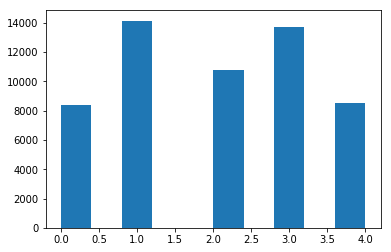

distinct values in y are now:[3 2 0 1 4]


In [188]:
# some outlier removal for
# When we use the DBSCN from last time my machine dies ;(

# IM RELATIVELY CONFIDENT THAT UP-SAMPLING OR DOWN-SAMPLING IN A BETTER WAY SHOULD
# DO THE HARDLINE
import pandas as pd

print(X_train.shape,y_train.shape)
print(y_train)
# balanced?
plt.hist(y_train)
plt.show()
# nope its not at all
#but how...

# lets balance classes
new_combined=pd.DataFrame(X_train)
new_combined['y']=pd.DataFrame(y_train)
print(f'distinct values in y:{new_combined.y.unique()}')
# get distinct y values
y_distinct=new_combined.y.unique()
min_sample_size=min([new_combined[new_combined.y==i].shape[0] for i in y_distinct])
#there is a mean and mx approach that can work, max was too much, so i now even go down to 50%
max_sample_size=int(np.max([new_combined[new_combined.y==i].shape[0] for i in y_distinct]))


print(f"The minimal amount of samples is {min_sample_size}")
print(f"The MAX amount of samples is {max_sample_size}")

balanced_X=pd.DataFrame()
balanced_Y=pd.DataFrame()
# lets upscale somehow, the gaussian approach doesnt work well
# probably since the true distribution is not gaussian
gaussian=False


for i in y_distinct:
    sample_amount=new_combined[new_combined.y==i].shape[0]
    if gaussian:
        #lets check that we dont add too much data
        diff=int((max_sample_size-sample_amount)*0.5)
        #lets assume some gaussian thingy
        working_set=new_combined[new_combined.y==i]
        working_set=working_set.drop(['y'],axis=1)
        if diff>0:
            print(f'generating an addition {diff} samples')
            print(f'working set shape:{working_set.shape}')
            mean=working_set.mean()
            cov=np.cov(working_set.T)
            print(f'shape mean:{mean.shape} shape cov:{cov.shape}')
            #we generate more points assuming a gaussian distribution
            generated=np.random.multivariate_normal(mean, cov, diff)
            print(generated)
            print(f'shape generated:{generated.shape}')
            generated_df=pd.DataFrame(generated)
            generated_df['y']=i
            balanced_X=balanced_X.append(generated_df)
        working_set['y']=i
        balanced_X=balanced_X.append(working_set)
    else:
        # random samples from the distribution and adds them until all classes are balanced
        diff=int((max_sample_size-sample_amount))
        working_set=new_combined[new_combined.y==i]
        working_set=working_set.drop(['y'],axis=1)
        if diff>0:
            # lets try bit how much to skew the org distribution
            generated=working_set.sample(frac=(diff/sample_amount)*0.4,replace=True)
            print(generated)
            print(f'shape generated:{generated.shape}')
            generated_df=pd.DataFrame(generated)
            generated_df['y']=i
            balanced_X=balanced_X.append(generated_df)
        working_set['y']=i
        balanced_X=balanced_X.append(working_set)

    
# ok that should now be muhc more data
print(balanced_X.head())
# shuffle again such that it makes bit more sense
balanced_X=balanced_X.sample(frac=1)
print(balanced_X.head())


balanced_Y=balanced_X.y
balanced_X=balanced_X.drop(['y'],axis=1)

assert balanced_X.shape[0]==balanced_Y.shape[0]
balanced_Y=balanced_Y.values.reshape((-1,))
balanced_X=balanced_X.values
print(f'We had {X_train.shape} samples and have scaled it to {balanced_X.shape} samples')
plt.hist(balanced_Y)
plt.show()
print(f'distinct values in y are now:{pd.DataFrame(balanced_Y)[0].unique()}')


# Helper functions to build, compile and fit models

In [180]:
def three_layer_model(units_first, units_second, units_third, n_final_classes, kernel_size=3):
    """Creates three layer model with dropout and regularization."""
    model = keras.Sequential([
        keras.layers.Dense(1024, activation=tf.nn.relu),
        keras.layers.Dropout(0.2, noise_shape=None, seed=None),
        keras.layers.Dense(256, activation=tf.nn.relu),
        keras.layers.Dropout(0.2, noise_shape=None, seed=None),
        keras.layers.BatchNormalization(),
        
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dropout(0.2, noise_shape=None, seed=None),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dropout(0.2, noise_shape=None, seed=None),
        keras.layers.Reshape((8,8)),
        # wierd but seems to work quite well
        keras.layers.MaxPooling1D(pool_size=4, strides=None, padding='valid', data_format='channels_last'),
        keras.layers.Flatten(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation=tf.nn.relu),
        #keras.layers.Embedding(units_third, 16),
        keras.layers.Dropout(0.2, noise_shape=None, seed=None),

        keras.layers.Dense(n_final_classes, activation=tf.nn.softmax)
    ])
    return model

def compile_model(model):
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
    
def fit_model(model, epochs, callbacks):
    #print(f'Shape x:{X_train.shape} y:{y_train}')
    print('type x:'+str(type(balanced_X)))
    print('type y:'+str(type(balanced_Y)))

    model.fit(balanced_X, balanced_Y, epochs=epochs, validation_split=0.2, verbose=1, shuffle=True, workers=-1,
             callbacks=callbacks)
    y_pred = model.predict_classes(balanced_X)
    print(classification_report(balanced_Y, y_pred))

# Define callbacks and tensorboard logging

In [181]:
from common import DATA_DIR_PATH
from tensorflow.keras import callbacks

In [182]:
LOG_DIR = os.path.join(DATA_DIR_PATH, DIR_NAME, 'logs')
tensorboard = callbacks.TensorBoard()
early_stopping = callbacks.EarlyStopping(patience=10)

# Build models

In [183]:
# U can define multiple models and compare them

models = [
    #('small',  compile_model(three_layer_model(128, 128, 128, 5))),
     
    #('medium', compile_model(three_layer_model(256, 256, 256, 5))),
          ('large',  compile_model(three_layer_model(512, 256, 128, 5)))]

# Or if u decided which one to use just define one and use it
# models = [('baseline', compile_model(three_layer_model(128, 128, 128, 5)))]

# Fit

In [189]:
EPOCHS = 50  # pretty high since we have early stopping callback anyway

for name, model in models:
    print(f'Fitting model {name}...')
    log_path = os.path.join(LOG_DIR, name + '_' + neural_nets.get_date_time_tag())
    tensorboard.log_dir = log_path
    fit_model(model, epochs=EPOCHS, callbacks=[tensorboard,early_stopping])
              
              
              

Fitting model large...
type x:<class 'numpy.ndarray'>
type y:<class 'numpy.ndarray'>
Train on 44382 samples, validate on 11096 samples
Epoch 1/50
44382/44382 [==============================] - 10s 231us/sample - loss: 0.1446 - acc: 0.9532 - val_loss: 0.0941 - val_acc: 0.9727
Epoch 2/50
44382/44382 [==============================] - 10s 234us/sample - loss: 0.1404 - acc: 0.9538 - val_loss: 0.1013 - val_acc: 0.9681
Epoch 3/50
44382/44382 [==============================] - 10s 233us/sample - loss: 0.1335 - acc: 0.9552 - val_loss: 0.1086 - val_acc: 0.9674
Epoch 4/50
44382/44382 [==============================] - 10s 234us/sample - loss: 0.1326 - acc: 0.9561 - val_loss: 0.0984 - val_acc: 0.9704
Epoch 5/50
44382/44382 [==============================] - 10s 234us/sample - loss: 0.1279 - acc: 0.9574 - val_loss: 0.0966 - val_acc: 0.9720
Epoch 6/50
44382/44382 [==============================] - 11s 240us/sample - loss: 0.1277 - acc: 0.9569 - val_loss: 0.1006 - val_acc: 0.9709
Epoch 7/50
44382/44

# For better visualization of all current and past runs, use tensorboard
1) Go to the data directory (e.g. DATA_DIR_PATH/task3_data)  
2) Create a folder names "logs" (mkdir logs)  
3) Type ```tensorboard --logdir=logs```

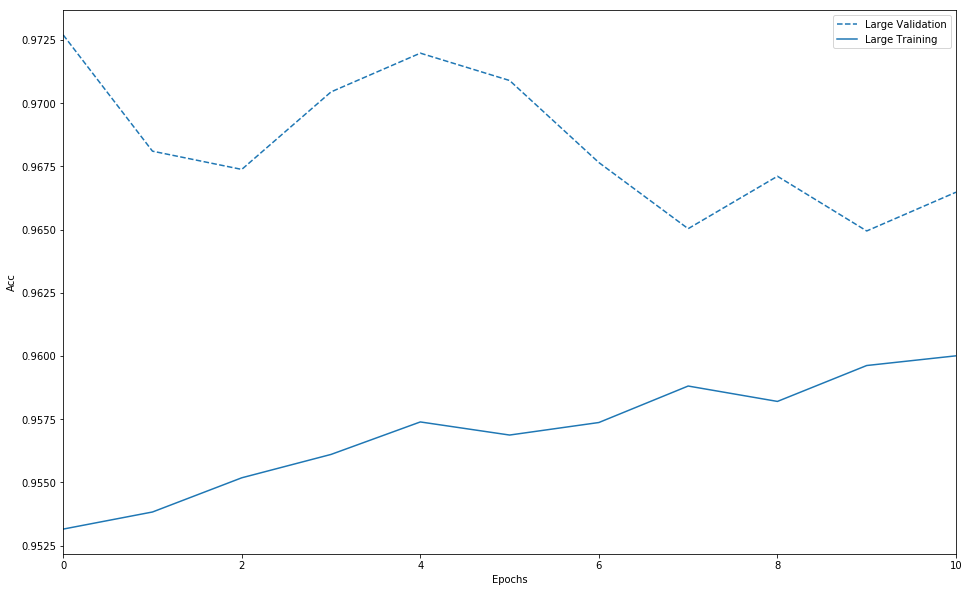

In [190]:
neural_nets.plot_history(models)  # can add more models as needed


# Performance evaluation on held out test dat
This is the section where we get a sense of how well our trained model is doing on the part of the training set we did not touch during training.  
**Only performed if HELD_OUT_TEST_SET_SIZE > 0**

In [143]:
from scikitplot.metrics import plot_confusion_matrix
from scikitplot.metrics import plot_roc

ModuleNotFoundError: No module named 'scikitplot'

In [191]:
def evaluate_models(models):
    results = {}
    for name, model in models:
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        results[name] = {'test accuracy': test_acc, 'test loss': test_loss}

    return pd.DataFrame(results).transpose()

def select_best_model(results_df, models):
    best_model_name = results_df.idxmax()['test accuracy']
    best_model = None
    for name, model in models:
        if name == best_model_name:
            best_model = model
            break
    return best_model_name, best_model


if len(X_test) > 0:
    results_df = evaluate_models(models)
    best_model_name, model = select_best_model(results_df, models)
    print(f'Best model: {best_model_name}')
    print(results_df)
    y_pred_proba = model.predict(X_test)
    y_pred = [np.argmax(proba) for proba in y_pred_proba]
    _ = plot_confusion_matrix(y_test, y_pred, figsize=(12, 8))
    _ = plot_roc(y_test, y_pred_proba, figsize=(8, 8))
else:
    print('There is no test data to test on.')

There is no test data to test on.


# Perform final prediction on provided test data set
Now we perform predictions on the provided, unlabelled data set for submission

In [192]:
y_pred_final = [np.argmax(proba) for proba in model.predict(final_test_data)]
y_pred_ids = final_indices



# Store the data
Putting everything into the right format and storing the results in the working data directory

In [193]:
data_handler.store_results_task3(y_pred_final, y_pred_ids)